In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn as sk
import numpy as np

In [118]:
flood_df = pd.read_csv('../data/cleaned_flood_data.csv')
non_flood_df = pd.read_csv('../data/cleaned_non_flood_data.csv')
county_test_df = pd.read_csv('../data/cleaned_county_test_data.csv')
full_county_df = pd.read_csv('../data/cleaned_full_county_test_data.csv')

In [119]:
full_df = pd.concat([flood_df, non_flood_df], ignore_index=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   YEAR                          18616 non-null  int64  
 1   MONTH                         18616 non-null  int64  
 2   BEGIN_TIME                    18616 non-null  int64  
 3   BEGIN_LAT                     18616 non-null  float64
 4   BEGIN_LON                     18616 non-null  float64
 5   STATE                         18616 non-null  object 
 6   EVENT_TYPE                    18616 non-null  object 
 7   FLOOD_CAUSE                   8782 non-null   object 
 8   EVENT_NARRATIVE               9215 non-null   object 
 9   temperature_2m_mean           18616 non-null  float64
 10  wind_speed_10m_mean           18616 non-null  float64
 11  cloud_cover_mean              18616 non-null  float64
 12  relative_humidity_2m_mean     18616 non-null  float64
 13  d

In [120]:
full_df = full_df.drop(['precipitation_sum', 'YEAR', 'STATE', 'FLOOD_CAUSE', 'EVENT_NARRATIVE', 'BEGIN_TIME'], axis=1)
test_df = county_test_df.drop(['precipitation_sum', 'YEAR', 'BEGIN_TIME'], axis=1)

In [121]:
print(" --- TRAINING DATA --- ")
for column in full_df.columns:
    num_na = full_df[full_df[column].isna()].shape[0]
    print(f"For column {column} there are {num_na} missing values.")

print("\n --- TEST DATA --- ")
for column in test_df.columns:
    num_na = test_df[test_df[column].isna()].shape[0]
    print(f"For column {column} there are {num_na} missing values.")

print("\n --- TEST 2 DATA --- ")
for column in full_county_df.columns:
    num_na = full_county_df[full_county_df[column].isna()].shape[0]
    print(f"For column {column} there are {num_na} missing values.")

 --- TRAINING DATA --- 
For column MONTH there are 0 missing values.
For column BEGIN_LAT there are 0 missing values.
For column BEGIN_LON there are 0 missing values.
For column EVENT_TYPE there are 0 missing values.
For column temperature_2m_mean there are 0 missing values.
For column wind_speed_10m_mean there are 0 missing values.
For column cloud_cover_mean there are 0 missing values.
For column relative_humidity_2m_mean there are 0 missing values.
For column dew_point_2m_mean there are 0 missing values.
For column rain_sum there are 0 missing values.
For column pressure_msl_mean there are 0 missing values.
For column soil_moisture_0_to_10cm_mean there are 0 missing values.
For column elevation there are 0 missing values.
For column is_primary_rain_season there are 0 missing values.
For column is_secondary_rain_season there are 0 missing values.
For column Flood_Zone_A there are 0 missing values.
For column Flood_Zone_AE there are 0 missing values.
For column Flood_Zone_AH there are

In [122]:
def convert_event_type(row):
    if row == 'Flash Flood':
        row = 'Flood'
    return row

In [123]:
# X = full_df.drop(columns=["EVENT_TYPE"])

# y = full_df['EVENT_TYPE'].apply(convert_event_type)

# le = sk.preprocessing.LabelEncoder()
# y_encoded = le.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y_encoded, test_size=0.2, random_state=42, stratify=y
# )

In [124]:
X_train_all = full_df.drop(columns=["EVENT_TYPE"])
y = full_df['EVENT_TYPE'].apply(convert_event_type)

print(pd.Series(y).value_counts(normalize=True))

le = sk.preprocessing.LabelEncoder()
y_train_all = le.fit_transform(y)

missing_cols = set(X_train_all.columns) - set(test_df.columns)
for c in missing_cols:
    test_df[c] = 0

X_inference = test_df[X_train_all.columns]

EVENT_TYPE
Flood     0.5
Normal    0.5
Name: proportion, dtype: float64


In [125]:
# # ===== Block 21: KNN + PCA + StandardScaler (model testing) =====

# from sklearn.experimental import enable_halving_search_cv
# scaler = sk.preprocessing.StandardScaler()
# pca = sk.decomposition.PCA()
# knn = sk.neighbors.KNeighborsClassifier()

# pipeline_knn = sk.pipeline.Pipeline(
#     steps=[
#         ("scaler", scaler),
#         ("pca", pca),
#         ("classifier", knn),
#     ]
# )

# param_grid_knn = {
#     "pca__n_components": list(range(5, 20)),
#     "classifier__n_neighbors": list(range(1, 26)),
# }
# knn_grid = sk.model_selection.HalvingGridSearchCV(
#     estimator=pipeline_knn,
#     param_grid=param_grid_knn,
#     cv=5,
#     scoring="accuracy",
#     n_jobs=-1,
# )
# scores = sk.model_selection.cross_val_score(
#     estimator=knn_grid,
#     X=X_train,
#     y=y_train,
#     cv=5,
#     verbose=3
# )
# print(f"KNN + PCA: average accuracy = {scores.mean():.4f}")

# knn_grid.fit(X_train, y_train)
# print("Best accuracy (KNN+PCA):", knn_grid.best_score_)
# print("Best parameters (KNN+PCA):", knn_grid.best_params_)

In [126]:
# scaler = sk.preprocessing.StandardScaler()
# mlp = sk.neural_network.MLPClassifier(max_iter=5000, random_state=42)

# pipeline_mlp = sk.pipeline.Pipeline(
#     steps=[
#         ("scaler", scaler),
#         ("classifier", mlp),
#     ]
# )

# param_grid_mlp = {
#     "classifier__hidden_layer_sizes": [(200, 100)],
#     "classifier__activation": ["tanh"],
#     "classifier__solver": ["adam"],
#     "classifier__alpha": [0.05],
#     "classifier__learning_rate_init": [0.001],
# }

# mlp_grid = sk.model_selection.GridSearchCV(
#     estimator=pipeline_mlp,
#     param_grid=param_grid_mlp,
#     cv=5,
#     scoring="accuracy",
#     verbose=3,
#     n_jobs=-1,
# )

# mlp_grid.fit(X_train, y_train)

# mlp_results = pd.DataFrame(mlp_grid.cv_results_)
# cols_to_keep = [
#     "param_classifier__hidden_layer_sizes",
#     "param_classifier__alpha",
#     "mean_test_score",
# ]
# print(
#     mlp_results[cols_to_keep]
#     .sort_values("mean_test_score", ascending=False)
# )

# print("Best parameters (MLP):", mlp_grid.best_params_)
# print("Best CV accuracy (MLP):", mlp_grid.best_score_)

# nested_scores = sk.model_selection.cross_val_score(
#     estimator=mlp_grid,
#     X=X_train,
#     y=y_train,
#     cv=5,
#     scoring="accuracy",
#     verbose=3,
#     n_jobs=-1
# )

# final_accuracy = np.mean(nested_scores)
# print(f"\nNested CV Mean Accuracy: {final_accuracy:.4f}")
# print(f"Individual Outer Fold Scores: {nested_scores}")
# print("Best Hyperparameters:", mlp_grid.best_params_)

In [135]:
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

flood_df = pd.read_csv('../data/cleaned_flood_data.csv')
non_flood_df = pd.read_csv('../data/cleaned_non_flood_data.csv')
full_df = pd.concat([flood_df, non_flood_df], ignore_index=True)
full_df = full_df.drop(['precipitation_sum', 'YEAR', 'STATE', 'FLOOD_CAUSE', 'EVENT_NARRATIVE', 'BEGIN_TIME'], axis=1)

X = full_df.drop(columns=["EVENT_TYPE"])

y = full_df['EVENT_TYPE'].apply(convert_event_type)

le = sk.preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y
)

model = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        hidden_layer_sizes=(200, 100), 
        activation="tanh", 
        solver="adam", 
        alpha=0.05, 
        learning_rate_init=0.001,
        max_iter=5000, 
        random_state=42
    )
)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1862
           1       0.83      0.84      0.83      1862

    accuracy                           0.83      3724
   macro avg       0.83      0.83      0.83      3724
weighted avg       0.83      0.83      0.83      3724



In [128]:
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

final_model = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        hidden_layer_sizes=(200, 100), 
        activation="tanh", 
        solver="adam", 
        alpha=0.05, 
        learning_rate_init=0.001,
        max_iter=5000, 
        random_state=42
    )
)

final_model.fit(X_train_all, y_train_all)

predicted_risk = final_model.predict_proba(X_inference)[:, 0]

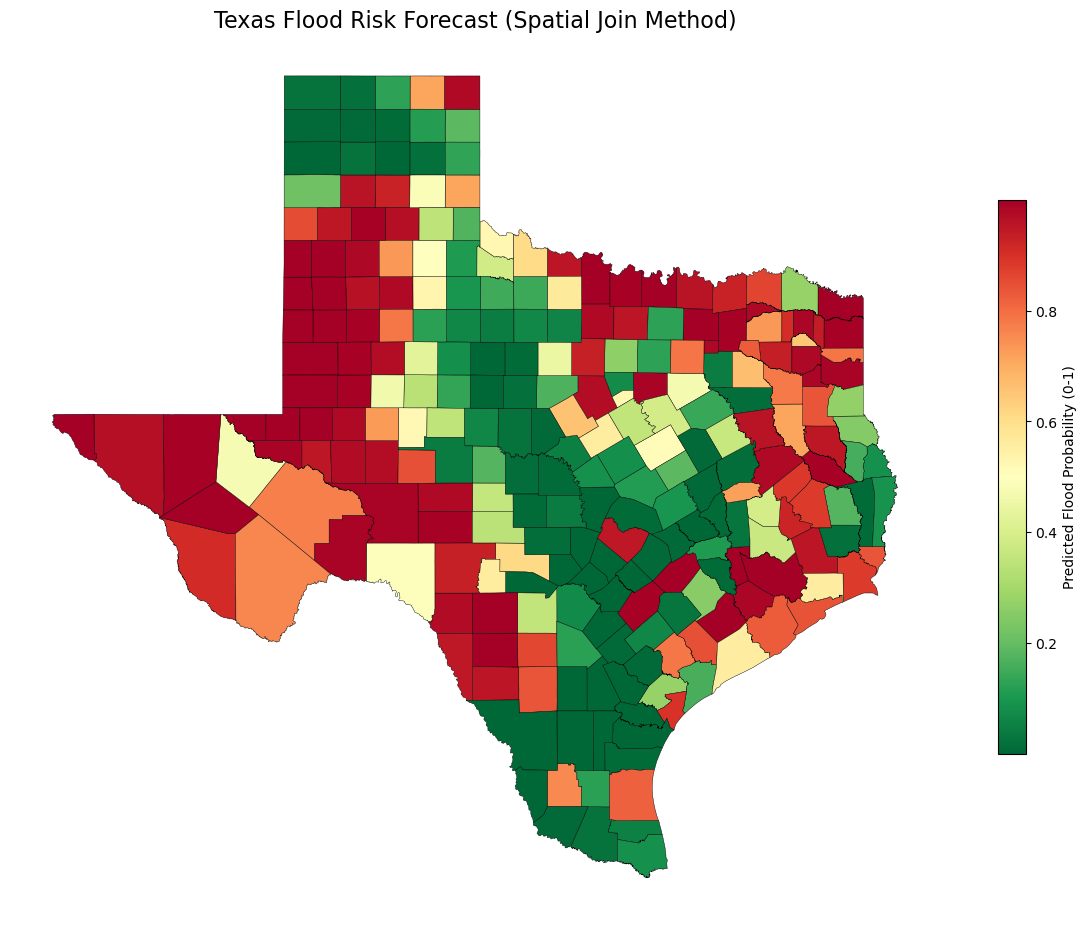

Top Riskiest Counties (Identified via Geometry):
      Risk_Score
957     0.999977
934     0.999965
1413    0.999946
2657    0.999911
1658    0.999850


In [129]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

county_test_df['Risk_Score'] = predicted_risk

gdf_points = gpd.GeoDataFrame(
    county_test_df, 
    geometry=gpd.points_from_xy(county_test_df.BEGIN_LON, county_test_df.BEGIN_LAT),
    crs="EPSG:4326"
)

census_url = "https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip"
gdf_counties = gpd.read_file(census_url)
gdf_tx = gdf_counties[gdf_counties['STATEFP'] == '48'].to_crs("EPSG:4326")

gdf_map = gpd.sjoin(gdf_tx, gdf_points, how="inner", predicate="contains")

fig, ax = plt.subplots(figsize=(15, 12))

gdf_map.plot(column='Risk_Score', 
             ax=ax, 
             legend=True,
             cmap='RdYlGn_r',
             edgecolor='black',
             linewidth=0.3,
             legend_kwds={'label': "Predicted Flood Probability (0-1)", 'shrink': 0.6})

plt.title("Texas Flood Risk Forecast (Spatial Join Method)", fontsize=16)
plt.axis('off')

plt.savefig("texas_flood_risk_map_spatial.png", dpi=300)
plt.show()

print("Top Riskiest Counties (Identified via Geometry):")
print(gdf_map[['Risk_Score']].sort_values(by='Risk_Score', ascending=False).head())

Original Risk Range: 0.14 - 0.73
Map normalized to 0.0 - 1.0


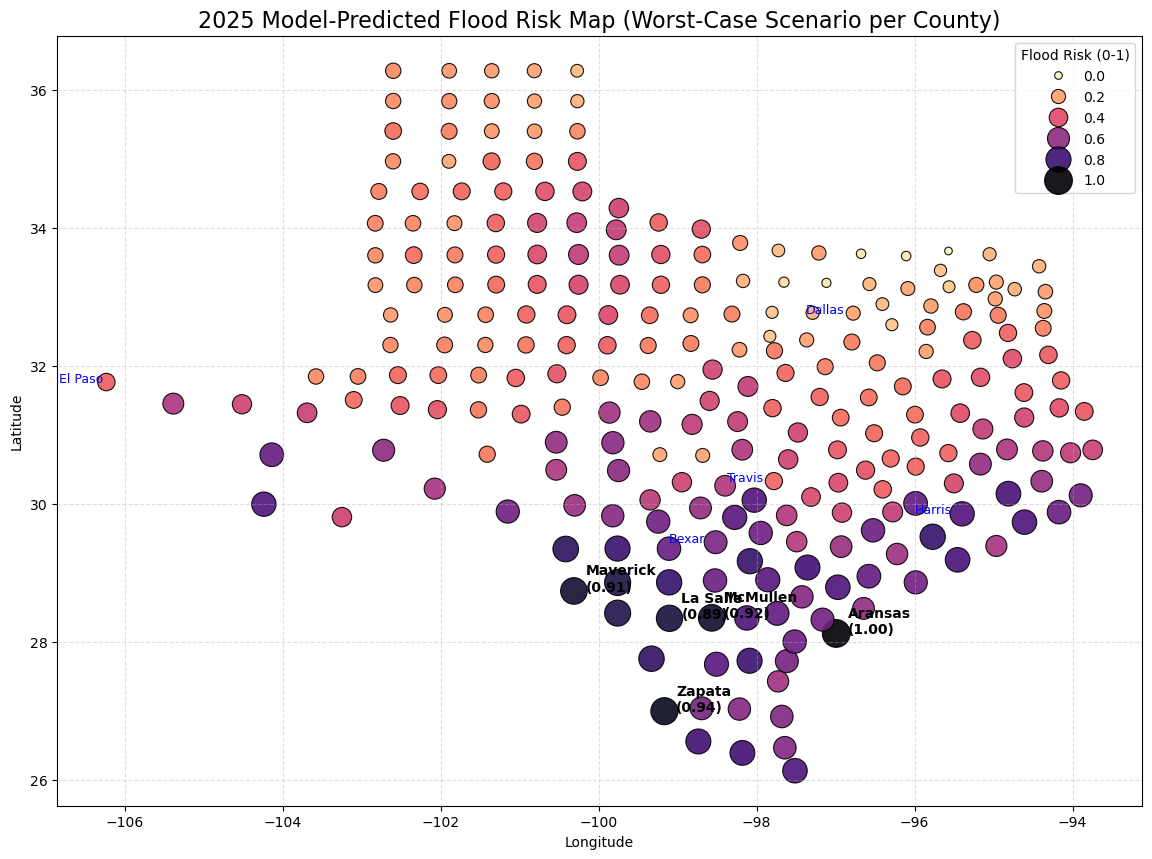

Top 10 Counties with Highest Normalized Predicted Flood Risk:
         NAME  Normalized_Risk_Index  rain_sum
3     Aransas               1.000000  3.308870
252    Zapata               0.944964  1.858537
161  McMullen               0.916887  1.677724
158  Maverick               0.907621  2.218435
138  La Salle               0.886948  0.619281


In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_drop = ['precipitation_sum', 'YEAR', 'BEGIN_TIME']
df_full = df_full.drop(columns=cols_to_drop, errors='ignore')

feature_cols = X_train_all.columns.tolist()
X_inference_full = df_full.copy()
X_inference_full = X_inference_full.reindex(columns=feature_cols, fill_value=0)

risk_cols = [c for c in feature_cols if 'Flood_Zone' in c and 'X' not in c]

is_risky = X_inference_full[risk_cols].max(axis=1)

if 'Is_In_Floodplain_False' in feature_cols:
    X_inference_full['Is_In_Floodplain_False'] = (is_risky == 0).astype(int)
    
if 'Is_In_Floodplain_True' in feature_cols:
    X_inference_full['Is_In_Floodplain_True'] = (is_risky == 1).astype(int)

X_inference_full['Flood_Zone_X'] = (is_risky == 0).astype(int)
df_full['Predicted_Flood_Risk'] = final_model.predict_proba(X_inference_full)[:, 0]

county_risk_map = df_full.groupby('NAME').agg({
    'Predicted_Flood_Risk': 'mean',
    'BEGIN_LAT': 'first',
    'BEGIN_LON': 'first',
    'rain_sum': 'max'
}).reset_index()

min_risk = county_risk_map['Predicted_Flood_Risk'].min()
max_risk = county_risk_map['Predicted_Flood_Risk'].max()

county_risk_map['Normalized_Risk_Index'] = (
    (county_risk_map['Predicted_Flood_Risk'] - min_risk) / (max_risk - min_risk)
)

print(f"Original Risk Range: {min_risk:.2f} - {max_risk:.2f}")
print("Map normalized to 0.0 - 1.0")

plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=county_risk_map,
    x='BEGIN_LON',
    y='BEGIN_LAT',
    hue='Normalized_Risk_Index',
    size='Normalized_Risk_Index',
    sizes=(30, 400),
    palette='magma_r',
    hue_norm=(0, 1),
    edgecolor='black',
    alpha=0.9
)

top_risk = county_risk_map.sort_values(by='Normalized_Risk_Index', ascending=False).head(5)
for _, row in top_risk.iterrows():
    plt.text(
        row['BEGIN_LON'] + 0.15, 
        row['BEGIN_LAT'], 
        f"{row['NAME']}\n({row['Normalized_Risk_Index']:.2f})", 
        color='black', 
        weight='bold',
        fontsize=10
    )

cities = ['Harris', 'Dallas', 'Travis', 'Bexar', 'El Paso']
for city in cities:
    city_data = county_risk_map[county_risk_map['NAME'] == city]
    if not city_data.empty:
        plt.text(
            city_data['BEGIN_LON'].values[0] - 0.6, 
            city_data['BEGIN_LAT'].values[0], 
            city, 
            color='blue', 
            fontsize=9
        )

plt.title('2025 Model-Predicted Flood Risk Map (Worst-Case Scenario per County)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Flood Risk (0-1)', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.4)

plt.savefig('model_flood_risk_map.png')
plt.show()

print("Top 10 Counties with Highest Normalized Predicted Flood Risk:")
print(top_risk[['NAME', 'Normalized_Risk_Index', 'rain_sum']])

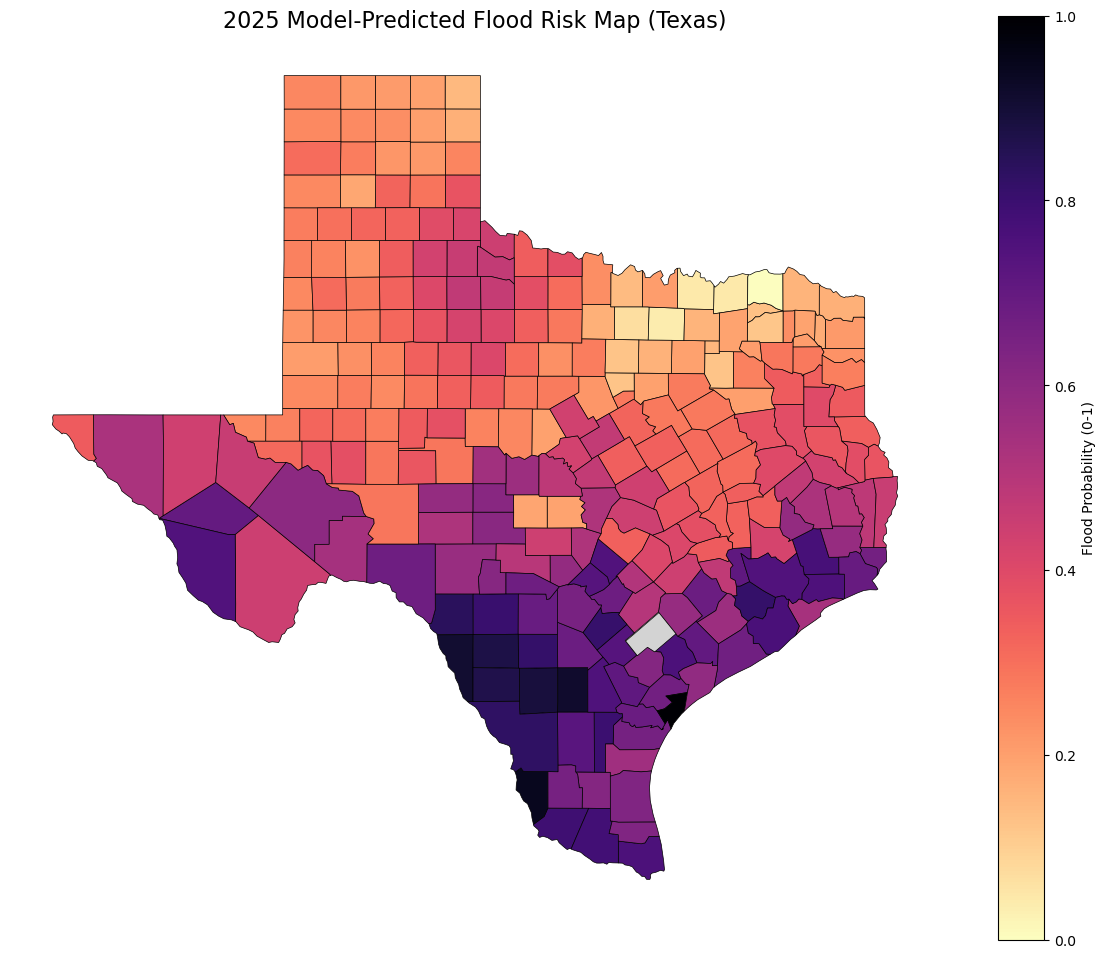

In [131]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip"
geo_df = gpd.read_file(shapefile_url)

texas_map = geo_df[geo_df['STATEFP'] == '48'].copy()

texas_map['NAME_CLEAN'] = texas_map['NAME'] 

merged_map = texas_map.merge(county_risk_map, left_on='NAME_CLEAN', right_on='NAME', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 12))
merged_map.plot(column='Normalized_Risk_Index', 
                cmap='magma_r', 
                ax=ax, 
                legend=True,
                edgecolor='black',
                linewidth=0.5,
                legend_kwds={'label': "Flood Probability (0-1)"},
                missing_kwds={'color': 'lightgrey'})

plt.title('2025 Model-Predicted Flood Risk Map (Texas)', fontsize=16)
plt.axis('off')
plt.show()

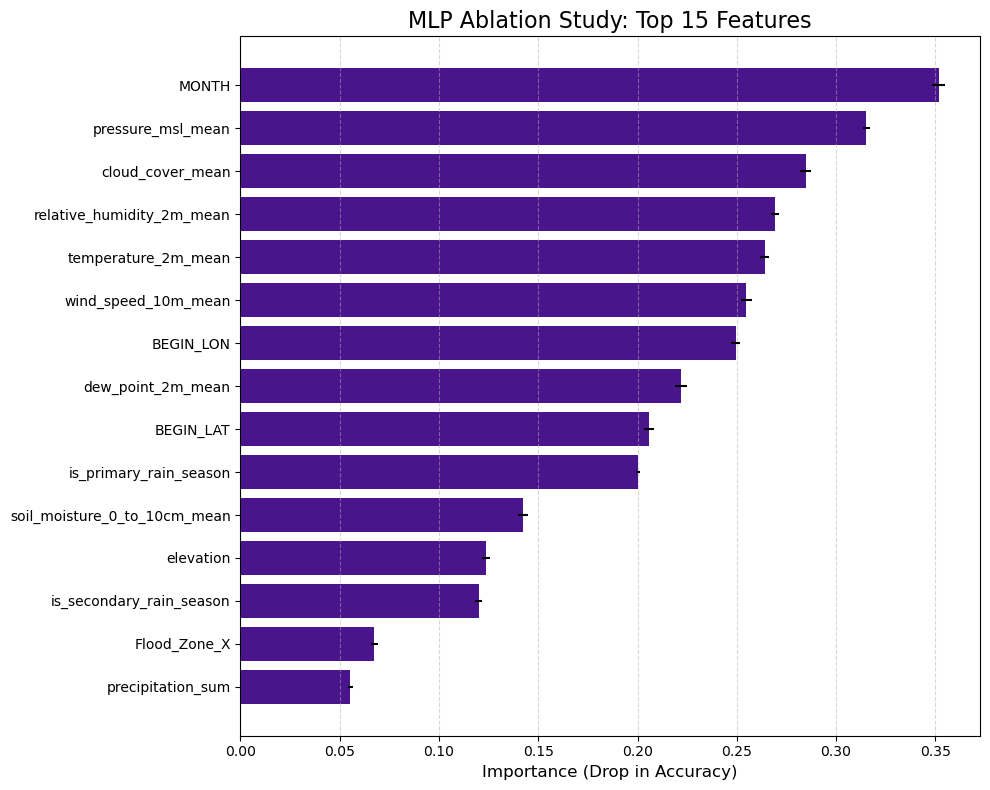


--- TOP 5 DRIVERS OF FLOOD RISK ---
MONTH: 0.3516 accuracy drop if removed
pressure_msl_mean: 0.3153 accuracy drop if removed
cloud_cover_mean: 0.2846 accuracy drop if removed
relative_humidity_2m_mean: 0.2694 accuracy drop if removed
temperature_2m_mean: 0.2640 accuracy drop if removed


In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance

flood_df = pd.read_csv('../data/cleaned_flood_data.csv')
non_flood_df = pd.read_csv('../data/cleaned_non_flood_data.csv')
full_df = pd.concat([flood_df, non_flood_df], ignore_index=True)

cols_to_drop = ["EVENT_TYPE", "BEGIN_TIME", "EVENT_NARRATIVE", "FLOOD_CAUSE", "STATE", "YEAR"] 

train_drop = [c for c in cols_to_drop if c in full_df.columns]
X_new_train = full_df.drop(columns=train_drop)

y = full_df['EVENT_TYPE'].apply(convert_event_type)

full_df = full_df.drop(columns=["EVENT_TYPE"])

le = sk.preprocessing.LabelEncoder()
y_train_all = le.fit_transform(y)

X_target = X_new_train
y_target = y_train_all
new_model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(200, 100), activation="tanh", max_iter=5000, random_state=42)
)
new_model.fit(X_target, y_target)

result = permutation_importance(
    new_model, 
    X_target, 
    y_target, 
    n_repeats=10, 
    random_state=42, 
    n_jobs=-1
)

perm_sorted_idx = result.importances_mean.argsort()
feature_names = X_target.columns.tolist()

sorted_features = [feature_names[i] for i in perm_sorted_idx]
sorted_importance = result.importances_mean[perm_sorted_idx]
sorted_std = result.importances_std[perm_sorted_idx]

top_n = 15
sorted_idx = result.importances_mean.argsort()[-top_n:]

plt.figure(figsize=(10, 8))
plt.barh(
    [feature_names[i] for i in sorted_idx], 
    result.importances_mean[sorted_idx], 
    xerr=result.importances_std[sorted_idx],
    color='#4a148c', 
    align='center'
)

plt.xlabel("Importance (Drop in Accuracy)", fontsize=12)
plt.title(f"MLP Ablation Study: Top {top_n} Features", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("\n--- TOP 5 DRIVERS OF FLOOD RISK ---")
top_5_indices = perm_sorted_idx[::-1][:5]
for i in top_5_indices:
    print(f"{feature_names[i]}: {result.importances_mean[i]:.4f} accuracy drop if removed")

In [120]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Define Season Logic (Must match your training exactly)
def update_season_flags(df, month):
    # Reset flags to 0
    df['is_primary_rain_season'] = 0
    df['is_secondary_rain_season'] = 0
    
    # Apply logic (Verify these months match your specific training data!)
    # Primary: May(5), June(6), Sept(9), Oct(10)
    # Secondary: April(4), Nov(11)
    if month in [5, 6, 9, 10]:
        df['is_primary_rain_season'] = 1
    if month in [4, 11]:
        df['is_secondary_rain_season'] = 1
    return df

feature_cols = X_train_all.columns.tolist()
X_inference_full = df_full.copy()
# This forces the columns to match training exactly, filling missing ones with 0
X_inference_full = X_inference_full.reindex(columns=feature_cols, fill_value=0)

# 3. APPLY THE FIX: Reconstruct 'Flood_Zone_X'
# We know 'Flood_Zone_X' is the safe zone.
# We also see 'Is_In_Floodplain_False' in your list—let's handle that too.

print("Applying Safe Zone Logic...")

# Identify Risk Columns (Any Flood_Zone that isn't X)
risk_cols = [c for c in feature_cols if 'Flood_Zone' in c and 'X' not in c]

# Check if a row has ANY risk flag
is_risky = X_inference_full[risk_cols].max(axis=1)

if 'Is_In_Floodplain_False' in feature_cols:
    # If Risk is 0, then Is_In_Floodplain_False should be 1
    X_inference_full['Is_In_Floodplain_False'] = (is_risky == 0).astype(int)
    
if 'Is_In_Floodplain_True' in feature_cols:
    # If Risk is 1, then Is_In_Floodplain_True should be 1
    X_inference_full['Is_In_Floodplain_True'] = (is_risky == 1).astype(int)


# 2. Create the "Worst-Case" Template
# Instead of .first(), we use .max() for weather to simulate a storm.
print("Constructing Worst-Case Weather Profiles...")

# Define how to handle each column
agg_dict = {
    # Dynamic Weather: Take the WORST case seen in your data
    'rain_sum': 'max',
    'precipitation_sum': 'max',
    'cloud_cover_mean': 'max',
    'soil_moisture_0_to_10cm_mean': 'max',
    'wind_speed_10m_mean': 'max',
    
    # Static Features: These don't change, so 'first' is safe
    'BEGIN_LAT': 'first',
    'BEGIN_LON': 'first',
    'elevation': 'first',
    'Flood_Zone_X': 'max', # Keep as 1 if it was ever 1
    
    # For any other columns, default to 'max' to be safe, or 'first' if static
}

# Dynamically build the dict for all columns in your inference set
# (This ensures we don't crash on missing columns)
final_agg = {}
for col in feature_cols:
    if col in agg_dict:
        final_agg[col] = agg_dict[col]
    elif col in X_inference_full.columns:
        # Default for unknown columns: use max (safest for risk estimation)
        final_agg[col] = 'max' 

# Group by County to get one "Super Row" per county
template_df = X_inference_full.groupby('NAME').agg(final_agg).reset_index()

# 3. The Simulation Loop (Updated)
print("Running Annual Cycle Simulation...")
monthly_predictions = []

for m in range(1, 13):
    # Create a fresh copy for this month
    current_month_df = template_df.copy()
    
    # A. Update the Month
    current_month_df['MONTH'] = m
    
    # B. Update the Season Flags (Explicitly!)
    current_month_df = update_season_flags(current_month_df, m)
    
    # C. Predict
    # Ensure columns are in the exact order the model expects
    current_month_df = current_month_df.reindex(columns=feature_cols, fill_value=0)
    
    pred = final_model.predict_proba(current_month_df)[:, 0]
    monthly_predictions.append(pred)

# 4. Find the Peak Risk
# Stack results and take the max across the 12 simulated months
all_months_matrix = np.vstack(monthly_predictions) 
max_risks = np.max(all_months_matrix, axis=0)

# Assign back to template for plotting
template_df['Annual_Max_Risk'] = max_risks

# 5. Normalize (0-1)
min_r = template_df['Annual_Max_Risk'].min()
max_r = template_df['Annual_Max_Risk'].max()
template_df['Normalized_Risk_Index'] = (template_df['Annual_Max_Risk'] - min_r) / (max_r - min_r)

# 6. Plotting
shapefile_url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip"
geo_df = gpd.read_file(shapefile_url)
texas_map = geo_df[geo_df['STATEFP'] == '48'].copy()
merged_map = texas_map.merge(template_df, on='NAME', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 12))
merged_map.plot(
    column='Normalized_Risk_Index',
    cmap='magma_r',
    linewidth=0.8,
    ax=ax,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Projected Peak Flood Risk (Normalized)", 'shrink': 0.6},
    missing_kwds={'color': 'lightgrey'}
)
plt.title('2025 Worst-Case Flood Risk Map (Simulated Peak)', fontsize=18)
plt.axis('off')
plt.show()

Applying Safe Zone Logic...
Constructing Worst-Case Weather Profiles...


KeyError: 'NAME'